In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn import preprocessing
from sklearn.model_selection import train_test_split



In [8]:
X, y = make_blobs(n_samples=2000, n_features=3, centers=1, random_state=0)

In [9]:
print(X.shape)

(2000, 3)


In [10]:
df = pd.DataFrame(X,y)
df.head()

,0,1,2
0,1.512682,4.172199,0.545810
0,0.700801,3.180845,1.988085
0,-1.807980,4.186426,2.042916
0,0.397782,4.015679,3.105769
0,0.579233,5.564432,2.240489


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 0
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2000 non-null   float64
 1   1       2000 non-null   float64
 2   2       2000 non-null   float64
dtypes: float64(3)
memory usage: 62.5 KB


In [12]:
df.describe()

,0,1,2
count,2000.000000,2000.000000,2000.000000
mean,0.968931,4.336114,2.012946
std,0.999441,0.986879,0.996588
min,-2.538498,0.863213,-1.769673
25%,0.277619,3.661223,1.358287
50%,0.943685,4.330627,2.016341
75%,1.634988,5.018101,2.667432
max,4.195576,7.405318,5.490075


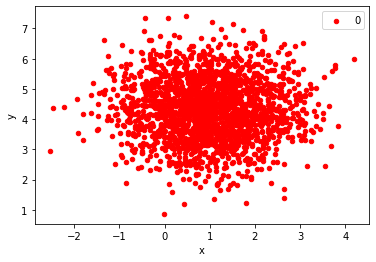

In [13]:
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

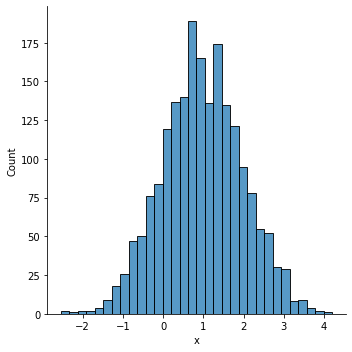

In [18]:
sns.displot(data=df, x="x")

In [21]:
df['label'].value_counts()

0    2000
Name: label, dtype: int64

In [23]:
#Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [24]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 1.0


In [25]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [28]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0
F1 Score = 1.0


In [36]:
import xgboost as xgb

In [37]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [38]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

[13:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [41]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.9966182 , 0.00169093, 0.00169093],
       [0.9966182 , 0.00169093, 0.00169093],
       [0.9966182 , 0.00169093, 0.00169093],
       [0.9966182 , 0.00169093, 0.00169093],
       [0.9966182 , 0.00169093, 0.00169093],
       [0.9966182 , 0.00169093, 0.00169093],
       [0.9966182 , 0.00169093, 0.00169093],
       [0.9966182 , 0.00169093, 0.00169093],
       [0.9966182 , 0.00169093, 0.00169093],
       [0.9966182 , 0.00169093, 0.00169093]], dtype=float32)

In [42]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [43]:
best_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [44]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0


## Model Evaluation 
As we see both Decision Tree and XGBoost Algorithm respond really well in this classification problem. They both have great accuracy in their predictions. We can't say if there is any underfitting or overfitting problem because we only used one label (y).